### Import modules

In [25]:
# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### load data 
- #### dataset (x: imdb article -> y: text type)
- #### word2idx dict (key: word; value: index)

In [27]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.imdb.load_data(num_words=vocab_size)
word2idx = tensorflow.keras.datasets.imdb.get_word_index()

### modifiy word2idx dict (to reflect x_train, x_text)

In [28]:
word2idx = {k:v+3 for k, v in word2idx.items()}
word2idx['<PAD>'] = 0
word2idx['<START>'] = 1
word2idx['<UNK>'] = 2
word2idx['<UNUSED>'] = 3

### create idx2word: inverse of word2idx

In [29]:
idx2word = {v:k for k, v in word2idx.items()}

### padding x_train, x_test

In [30]:
x_train = pad_sequences(x_train, value=word2idx['<PAD>'], padding='post', maxlen=256)
x_test = pad_sequences(x_test, value=word2idx['<PAD>'], padding='post', maxlen=256)

### create model

In [7]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [9]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
print(model.input_shape)
print(model.output_shape)

(None, None)
(None, 1)


### train model

In [11]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 16750 samples, validate on 8250 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
16750/16750 [==============================] - 15s 898us/sample - loss: 0.6549 - acc: 0.7109 - val_loss: 0.5854 - val_acc: 0.7869
Epoch 2/10
16750/16750 [==============================] - 14s 846us/sample - loss: 0.5036 - acc: 0.8279 - val_loss: 0.4434 - val_acc: 0.8398
Epoch 3/10
16750/16750 [==============================] - 15s 871us/sample - loss: 0.3854 - acc: 0.8692 - val_loss: 0.3679 - val_acc: 0.8628
Epoch 4/10
16750/16750 [==============================] - 15s 889us/sample - loss: 0.3204 - acc: 0.8867 - val_loss: 0.3291 - val_acc: 0.8739
Epoch 5/10
16750/16750 [==============================] - 15s 869us/sample - loss: 0.2799 - acc: 0.9016 - val_loss: 0.3064 - val_acc: 0.8805
Epoch 6/10
16750/16750 [==============================] - 15s 877us/sample - loss: 0.2506 - acc: 0.9116 - val_loss: 0.2929 - val_acc: 0.8847
Epoch 7/10
16750/16750 [==============================] -

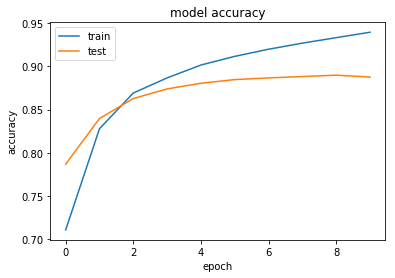

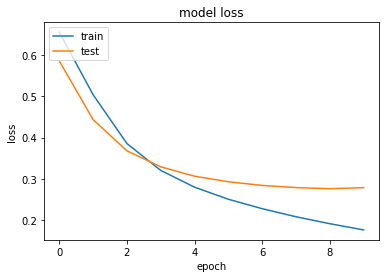

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### test model

In [14]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 117us/sample - loss: 0.2913 - acc: 0.8798


[0.2913140876865387, 0.8798]

### inference

In [23]:
testID = 100
print(' '.join([idx2word[idx] for idx in x_test[testID]]))

out = model.predict(x_test[testID].reshape(1,256))
print(y_test[testID])
print(out)

<START> a quick glance at the premise of this film would seem to indicate just another dumb <UNK> <UNK> <UNK> slash fest the type where sex equals death and the actors are all annoying stereotypes you actually want to die however delivers considerably more br br rather than focus on bare flesh and gore though there is a little of each no sex however the flick focuses on delivering impending dread <UNK> tension amidst a lovely <UNK> backdrop these feelings are further <UNK> by a cast of realistically likable characters and <UNK> that are more amoral than cardboard <UNK> of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' <UNK> came from <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <